<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/Capstone_GCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EMPLOYEE EXIT PREDICTION**



# **1. Introduction**


**Your client for this project is the HR Department at a software company.**

* They want to try a new initiative to retain employees.
* The idea is to use data to predict whether an employee is likely to leave.
* Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
* They only want to deal with the data that is related to permanent employees.

**Current Scenario:**

Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.









# **2. Problem Statement**
**The current process suffers from the following problems:**

* This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
* The second problem is these insights can't be aggregated and interlaced across all employees who have left.
* The third is that it is too late by the time the proposed policy changes take effect.


The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.

**Your Role**
* You are given datasets of past employees and their status (still employed or already left).
* Your task is to build a classification model using the datasets.
* Because there was no machine learning model for this problem in the company, you don’t have quantifiable win condition. You need to build the best possible model.

**Problem Specifics**
* Deliverable: Predict whether an employee will stay or leave.
* Machine learning task: Classification
* Target variable: Status (Employed/Left)
* Win condition: N/A (best possible model)


# **3. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
pip install mysql-connector-python-rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 67.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector-python-rf: filename=mysql_connector_python_rf-2.2.2-cp39-cp39-linux_x86_64.whl size=249472 sha256=92fee3f983f60bf4a1c91f5baa16fb125f9f3e779abbf9df2d6bfab70013bd85
  Stored in directory: /root/.cache/pip/wheels/64/06/5b/ef9543936a3f5de15b02775b6ae548a09f3ed2319d20342771
Successfully built mysql-connector-python-rf


In [3]:
!pip install scikit-learn==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 64.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [4]:
import sklearn 
print(sklearn.__version__)

1.2.0


# **4. Data Acquisition & Description**

The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).


---
**department_data**





This dataset contains information about each department. The schema of the dataset is as follows:

* dept_id – Unique Department Code
* dept_name – Name of the Department
* dept_head – Name of the Head of the Department
---
**employee_data**





This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

* employee_id – Unique ID Number for each employee
* age – Age of the employee
* gender – Gender of the employee
* marital_status – Marital Status of the employee
---
**employee_work_data**





This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

**Administrative information**

* status – Current employment status (Employed / Left)(Target Variable)
* department – Department to which the employees belong(ed) to
* salary – Salary level with respect to rest of their department
* tenure – Number of years at the company
* recently_promoted – Was the employee promoted in the last 3 years?
* employee_id – Unique ID Number for each employee

**Workload information**

* n_projects – Number of projects employee has worked on
* avg_monthly_hrs – Average number of hours worked per month

**Mutual evaluation information**

* satisfaction – Score for employee’s satisfaction with the company (higher is better)
* last_evaluation – Score for most recent evaluation of employee (higher is better)
* filed_complaint – Has the employee filed a formal complaint in the last 3 years?





In [5]:
import mysql.connector as connection
try:
  mydb=connection.connect(host="cpanel.insaid.co", database="Capstone2",user="student", 
                          passwd="student")
  query="select * from department_data"
  department_data_df=pd.read_sql(query,mydb)
  # mydb.close()
  query="select * from employee_details_data"
  employee_data_df=pd.read_sql(query,mydb)
  # mydb.close()
  query="select * from employee_data"
  employee_work_data_df=pd.read_sql(query,mydb)
  # mydb.close()
except Exception as e:
  mydb.close()
  print("Error Occured", e)

In [6]:
department_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


### **department_data_df**

In [7]:
department_data_df

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


### **employee_data_df**

In [8]:
employee_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [9]:
employee_data_df.describe()

,employee_id,age
count,14245.000000,14245.000000
mean,112123.050544,32.889926
std,8500.457343,9.970834
min,100101.000000,22.000000
25%,105775.000000,24.000000
50%,111298.000000,29.000000
75%,116658.000000,41.000000
max,148988.000000,57.000000


### **employee_work_data_df**

In [10]:
employee_work_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [11]:
employee_work_data_df.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


### **Load Test Data**

In [12]:
dataValidation= pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/GCD_Capstone_Project_unseen_data.xlsx")

empId=dataValidation.employee_id
dataValidation=dataValidation.drop("employee_id",axis=1)
dataValidation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
dtypes: float64(5), int64(2), object(2)
memory usage: 7.2+ KB


### **Observations and Action**
1. filed_complaint and recently_promoted is a categorical variable hence will be converting it to object type

In [13]:
employee_work_data_df[["filed_complaint","recently_promoted"]]=\
employee_work_data_df[["filed_complaint","recently_promoted"]].astype("object")
dataValidation[["filed_complaint","recently_promoted"]]=\
dataValidation[["filed_complaint","recently_promoted"]].astype("object")

In [14]:
employee_work_data_df.describe()

,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure,employee_id
count,14150.000000,12663.000000,14150.000000,14000.000000,14000.000000,14150.000000
mean,199.994346,0.718399,3.778304,0.621212,3.499357,112080.750247
std,50.833697,0.173108,1.250162,0.250482,1.462584,8748.202856
min,49.000000,0.316175,1.000000,0.040058,2.000000,0.000000
25%,155.000000,0.563711,3.000000,0.450356,3.000000,105772.500000
50%,199.000000,0.724731,4.000000,0.652394,3.000000,111291.500000
75%,245.000000,0.871409,5.000000,0.824925,4.000000,116650.750000
max,310.000000,1.000000,7.000000,1.000000,10.000000,148988.000000


### **Check Unique Values in each categorical Column for sanity**

In [15]:
for col in employee_work_data_df.select_dtypes(include="object").columns:
  print("\033[4m",col.upper(),"\033[0m\n", employee_work_data_df[col].value_counts())


 DEPARTMENT 
 D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1157
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64
 FILED_COMPLAINT 
 1.0    2046
Name: filed_complaint, dtype: int64
 RECENTLY_PROMOTED 
 1.0    297
Name: recently_promoted, dtype: int64
 SALARY 
 low       6906
medium    6101
high      1143
Name: salary, dtype: int64
 STATUS 
 Employed    10784
Left         3366
Name: status, dtype: int64


### **Observations and Action**
1. Department D00-IT is recorded as just -IT for 207 records, needs to updated to D00-IT

In [16]:
employee_work_data_df.department=employee_work_data_df.department.replace(["-IT"],"D00-IT")
print(employee_work_data_df.department.value_counts())
dataValidation.department=employee_work_data_df.department.replace(["-IT"],"D00-IT")
print(dataValidation.department.value_counts())


D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64
D00-SS     29
D00-SP     16
D00-ENG    15
D00-MT      9
D00-PD      6
D00-IT      6
D00-AD      4
D00-FN      4
D00-MN      1
D00-PR      1
D00-TP      1
Name: department, dtype: int64


### **Merge Dataframes**

In [17]:
emp_data = pd.merge(employee_work_data_df, employee_data_df, on='employee_id', how='left')

In [18]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14150 entries, 0 to 14149
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   object 
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    object 
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
 11  age                14145 non-null  float64
 12  gender             14145 non-null  object 
 13  marital_status     14145 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 1.6+ MB


In [19]:
emp_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42.0,Female,Married
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346,51.0,Female,Married
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707,23.0,Female,Unmarried


In [20]:
data = pd.merge(emp_data, department_data_df, how='left',left_on="department",right_on="dept_id")

In [21]:
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42.0,Female,Married,NaN,NaN,NaN
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried,NaN,NaN,NaN
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried,D00-SS,Sales,Edward J Bayley
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346,51.0,Female,Married,D00-SP,Support,Amelia Westray
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707,23.0,Female,Unmarried,D00-SS,Sales,Edward J Bayley


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14150 entries, 0 to 14149
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   object 
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    object 
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
 11  age                14145 non-null  float64
 12  gender             14145 non-null  object 
 13  marital_status     14145 non-null  object 
 14  dept_id            13443 non-null  object 
 15  dept_name          13443 non-null  object 
 16  dept_head          134

### **Delete Unnecessary Columns**

In [23]:
#Remove unnecessary column
data.drop(["dept_id","employee_id","dept_head"],inplace=True,axis=1)

In [24]:
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender,marital_status,dept_name
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,42.0,Female,Married,NaN
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,23.0,Female,Unmarried,NaN
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,24.0,Female,Unmarried,Sales
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,51.0,Female,Married,Support
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,23.0,Female,Unmarried,Sales


# **5. Data Pre-Processing**

### **5.1 Data Pre-Profiling**


### **Check null value or any other inconsistent value in column**

In [25]:
print((data=="").sum(), "\n")
print((dataValidation=="").sum(), "\n")

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
age                  0
gender               0
marital_status       0
dept_name            0
dtype: int64 

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
tenure               0
dtype: int64 



In [26]:
print(data.isna().sum(), "\n")
print(dataValidation.isna().sum(), "\n")

avg_monthly_hrs          0
department             707
filed_complaint      12104
last_evaluation       1487
n_projects               0
recently_promoted    13853
salary                   0
satisfaction           150
status                   0
tenure                 150
age                      5
gender                   5
marital_status           5
dept_name              707
dtype: int64 

avg_monthly_hrs       0
department            8
filed_complaint      85
last_evaluation      17
n_projects            0
recently_promoted    97
salary                0
satisfaction          3
tenure                3
dtype: int64 



In [27]:
print((data=="Unknown").sum(), "\n")
print((dataValidation=="Unknown").sum(), "\n")

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
age                  0
gender               0
marital_status       0
dept_name            0
dtype: int64 

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
tenure               0
dtype: int64 



In [28]:
print((data==0).sum(), "\n")
print((dataValidation==0).sum(), "\n")

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
age                  0
gender               0
marital_status       0
dept_name            0
dtype: int64 

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
tenure               0
dtype: int64 



In [29]:
#Check Duplicate Values
data.duplicated().sum()

29

### **Observations and Actions**
1. There are 29 duplicate records- delete duplicate records
2. Followig Columns have null values
	1. Dept,gender, martial status-Replace with Mode
    2. tenure, Age- Replace with Median as data is skewed
    3. last_evaluation,satisfaction- Replace with KNN Imputer
	4. filed_complaint,recently_promoted- Replace with 0 assuming no complaint hence null
  


### **5.3 Data Cleaning**


### **Drop Duplicate Records**

In [30]:
data.drop_duplicates(inplace=True,ignore_index=True)
print(data.shape)

(14121, 14)


### **Impute Missing Records**

In [31]:
data.department=data.department.replace(to_replace=[None], value=np.nan)
dataValidation.department=dataValidation.department.replace(to_replace=[None], value=np.nan)

In [32]:
data.isna().sum()

avg_monthly_hrs          0
department             707
filed_complaint      12080
last_evaluation       1487
n_projects               0
recently_promoted    13824
salary                   0
satisfaction           150
status                   0
tenure                 150
age                      5
gender                   5
marital_status           5
dept_name              707
dtype: int64

In [33]:
dataValidation.isna().sum()

avg_monthly_hrs       0
department            8
filed_complaint      85
last_evaluation      17
n_projects            0
recently_promoted    97
salary                0
satisfaction          3
tenure                3
dtype: int64

In [34]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
colTrans=ColumnTransformer([
    ("simImpMode",SimpleImputer(strategy="most_frequent"),["department","dept_name","gender","marital_status"]),
    ("simImpMed",SimpleImputer(strategy="median"),["tenure","age"]),
    ("knnImp",KNNImputer(n_neighbors=5),["last_evaluation","satisfaction"]),
    ("simImpCons",SimpleImputer(strategy="constant",fill_value=0),["filed_complaint","recently_promoted"])
],remainder="passthrough",verbose_feature_names_out=False)
# colTrans.setoutput to dataframe
colTrans.set_output(transform="pandas")
data=colTrans.fit_transform(data)
data.isna().sum()
#Adding status to use .transform , 
# Redefining structure of test data to apply columntransformer.transform(), else its giving error as columns are not matching in training 
#  but these features would not be used for prediction

dataValidation["dept_name"]=np.nan
dataValidation["gender"]=np.nan
dataValidation["marital_status"]=np.nan
dataValidation["age"]=np.nan
dataValidation["status"]=np.nan

dataValidation=colTrans.transform(dataValidation)
print(dataValidation.isna().sum())
dataValidation.drop(["dept_name","gender","marital_status","age","status"], axis=1,inplace=True)
dataValidation.isna().sum()


department             0
dept_name              0
gender                 0
marital_status         0
tenure                 0
age                    0
last_evaluation        0
satisfaction           0
filed_complaint        0
recently_promoted      0
avg_monthly_hrs        0
n_projects             0
salary                 0
status               100
dtype: int64


department           0
tenure               0
last_evaluation      0
satisfaction         0
filed_complaint      0
recently_promoted    0
avg_monthly_hrs      0
n_projects           0
salary               0
dtype: int64

In [35]:
dataValidation.isna().sum()

department           0
tenure               0
last_evaluation      0
satisfaction         0
filed_complaint      0
recently_promoted    0
avg_monthly_hrs      0
n_projects           0
salary               0
dtype: int64

### **Convert Labels to Numericals values**

In [36]:
data["status"]=data["status"].replace({"Employed":0, "Left":1})

### **5.2 Feature Engineering**
NA

### **Observation**
* Tenure and Age columns are right skewed

# **6. Exploratory Data Analysis**

### **Fetch Categorical and Numetrical Columns**

In [37]:
contColumn=data.select_dtypes(include=np.number).columns
print(contColumn)
catColumn=data.select_dtypes(include="object").columns
print(catColumn)

Index(['tenure', 'age', 'last_evaluation', 'satisfaction', 'avg_monthly_hrs',
       'n_projects', 'status'],
      dtype='object')
Index(['department', 'dept_name', 'gender', 'marital_status',
       'filed_complaint', 'recently_promoted', 'salary'],
      dtype='object')


### **Check distribution of numerical features and Outliers**

In [38]:
data[contColumn].describe()

,tenure,age,last_evaluation,satisfaction,avg_monthly_hrs,n_projects,status
count,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000
mean,3.492458,32.894625,0.716270,0.621238,199.999929,3.778132,0.237802
std,1.453321,9.973503,0.166773,0.249168,50.832419,1.249926,0.425752
min,2.000000,22.000000,0.316175,0.040058,49.000000,1.000000,0.000000
25%,3.000000,24.000000,0.571475,0.452711,155.000000,3.000000,0.000000
50%,3.000000,29.000000,0.718308,0.648253,199.000000,4.000000,0.000000
75%,4.000000,41.000000,0.858775,0.822855,245.000000,5.000000,0.000000
max,10.000000,57.000000,1.000000,1.000000,310.000000,7.000000,1.000000


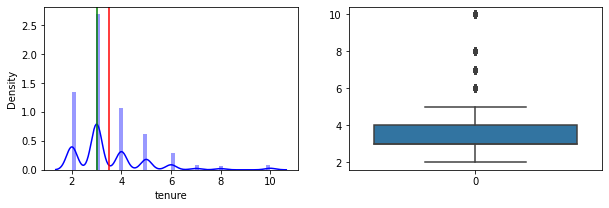

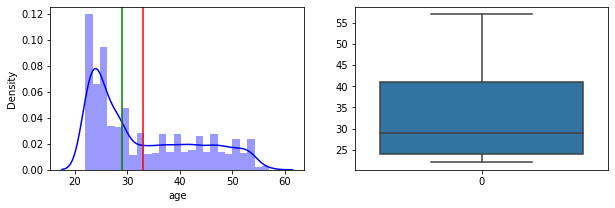

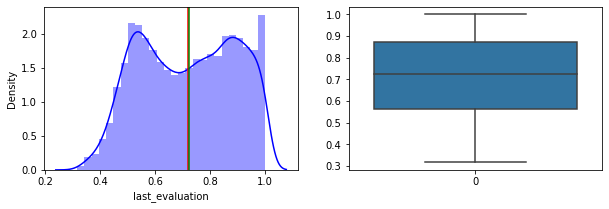

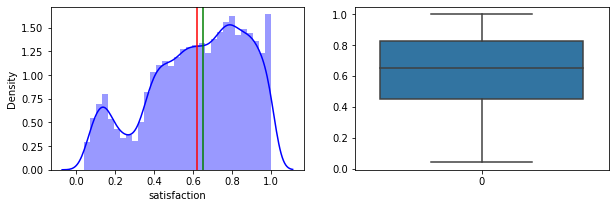

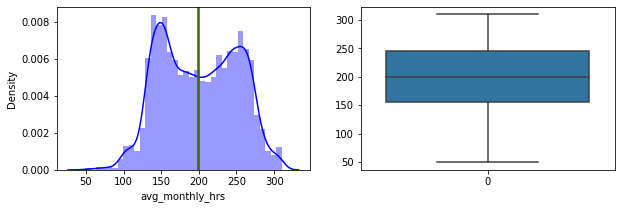

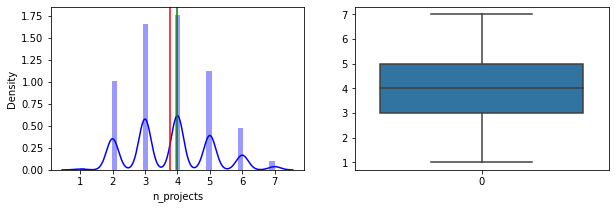

<Figure size 720x216 with 0 Axes>

In [39]:
for col in contColumn:  
  fig=plt.figure(figsize=[10,3])
  if col!="status":
    plt.subplot(1,2,1)
    sns.distplot(emp_data[col], color="b")
    plt.axvline(emp_data[col].mean(), color="r")
    plt.axvline(emp_data[col].median(), color="g")
    plt.subplot(1,2,2)
    sns.boxplot(emp_data[col])


  

### **Observations**
1. More employee with 2-4 years of tenure
2. More Employee within 20-30 years of Age

In [40]:
# catColumn.reverse()
# catColumn

### **Check the frequency of categorical features**

In [41]:
catColumn=catColumn.to_list()


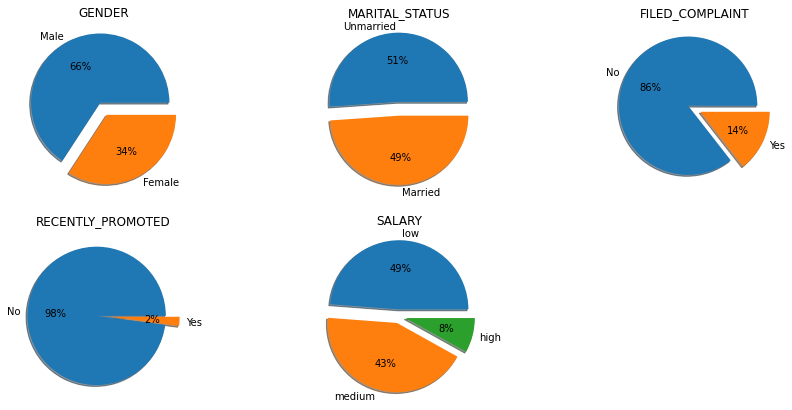

In [42]:
# fig=plt.figure(figsize=[25,10])
fig=plt.figure(figsize=[15,7])
i=1
for col in catColumn:  
  if (col !="department" and col!="dept_name"):
    plt.subplot(2,3,i)
    space = np.ones(data[col].nunique())/10    
    if col=="status":
      value=data[col].replace({0:"Employed", 1:"Left"})
      value.value_counts().plot(kind='pie', explode=space, autopct='%1.0f%%',shadow = True)
    elif col=="recently_promoted":
      value=data[col].replace({0:"No", 1:"Yes"})
      value.value_counts().plot(kind='pie', explode=space, autopct='%1.0f%%',shadow = True)
    elif col=="filed_complaint":
      value=data[col].replace({0:"No", 1:"Yes"})
      value.value_counts().plot(kind='pie', explode=space, autopct='%1.0f%%',shadow = True)
    else:
      data[col].value_counts().plot(kind='pie', explode=space, autopct='%1.0f%%',shadow = True)
    plt.title(col.upper())
    plt.ylabel("")
    i=i+1



Text(0, 0.5, '')

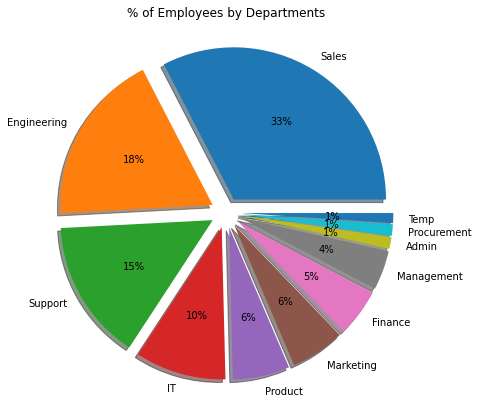

In [43]:
fig=plt.figure(figsize=[15,7])
space = np.ones(data["dept_name"].nunique())/10
data["dept_name"].value_counts().plot(kind='pie', explode=space, autopct='%1.0f%%',shadow = True)
plt.title("% of Employees by Departments")
plt.ylabel("")


### **Analyze Relationship between each Categorical Variable and Target Variable**

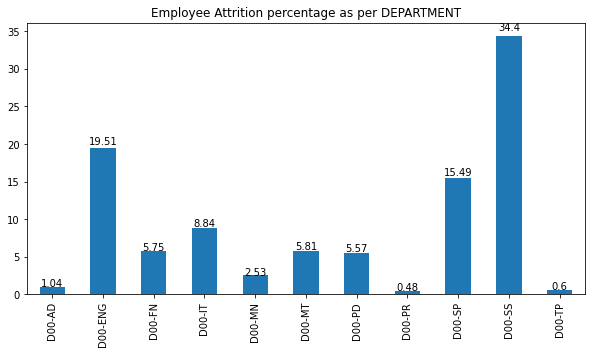

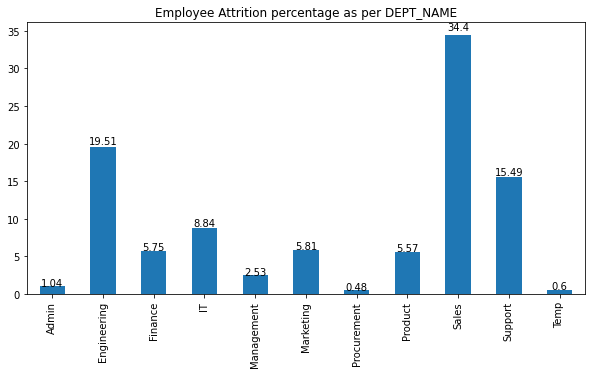

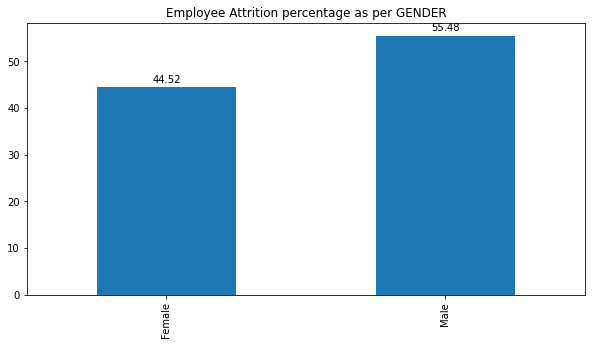

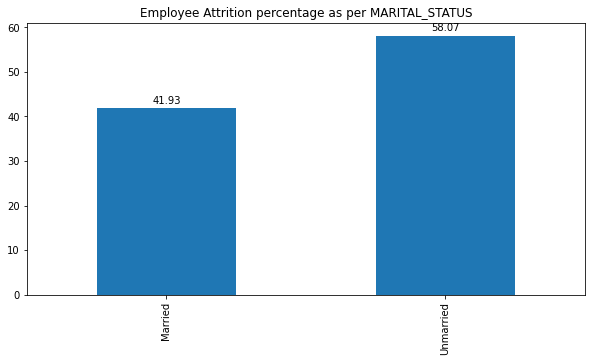

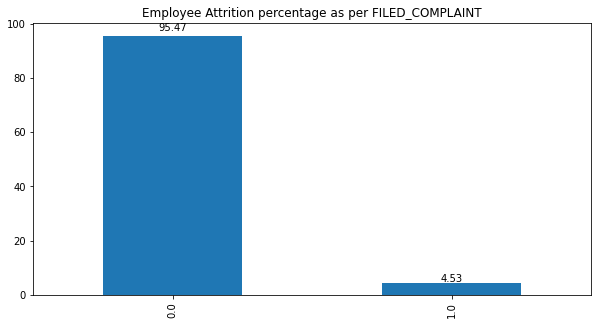

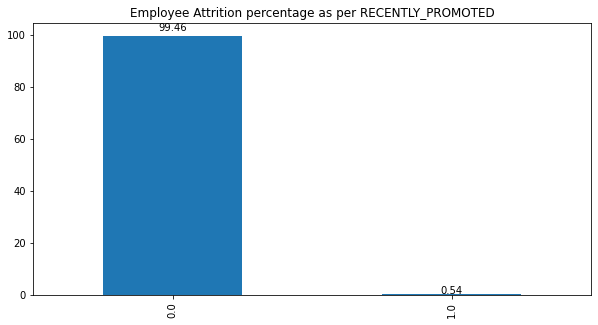

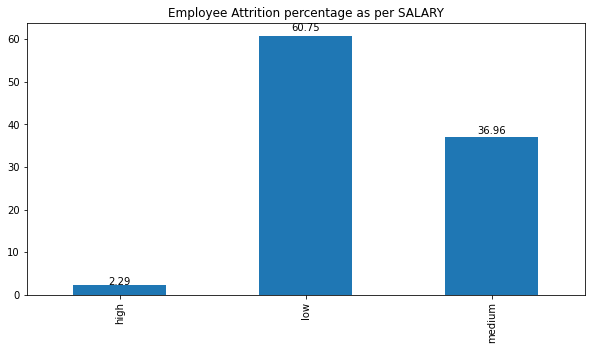

In [44]:
dataLeft=data[data.status==1]
i=1
for col in catColumn:
  if (col!="status" and col!="dept_id"):  
    fig=plt.figure(figsize=[10,5])
    df=dataLeft.groupby([col])[col].count()
    # print(df)
    # plt.subplot(3,2,i)
    ax = df.div(df.sum(axis=0), axis=0).mul(100).round(2).plot.bar()
    # i=i+1
    for p in ax.patches:
      width=p.get_width()
      height=p.get_height()
      x,y=p.get_xy()
      ax.annotate(height,(x+width/2,y+height*1.02),ha="center")
      plt.title("Employee Attrition percentage as per "+col.upper())
      plt.xlabel("")

### **Observations**
1. More exit from sales Dept followed by Engineering and then support
2. Unmarried segment has more exit movement
3. Male pupulation is quitting more than Female
4. Low salary grade is quitting more than others
5. People not promoted recently are quitting more than promoted ones
6. People who had filed complaint are quitting more than   

### ***Check the evaluation score of people not promoted ***

<Axes: xlabel='last_evaluation', ylabel='Density'>

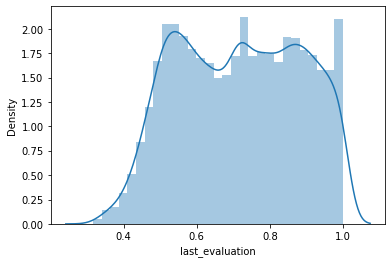

In [45]:
data1=data[data['recently_promoted']==0]["last_evaluation"]
sns.distplot(data1)

### **Analyze Relationship between Gender and Marital Status to Target Variable**

<Axes: xlabel='marital_status', ylabel='gender'>

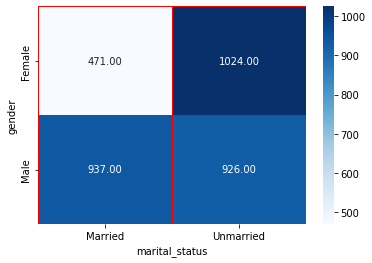

In [46]:
data1=dataLeft.groupby(["gender","marital_status"])["status"].count().unstack()
sns.heatmap(data1,annot=True,cmap="Blues",linecolor='Red',linewidth=1,fmt=".2f")

### **Observations**
* Unmarried Female have more exit movements followed by Married Male and then unmarried Male


### **Analyze Relationship between Gender and Marital status to Target Variable in Top 3 dept in attrition**

Text(0.5, 1.0, 'Support')

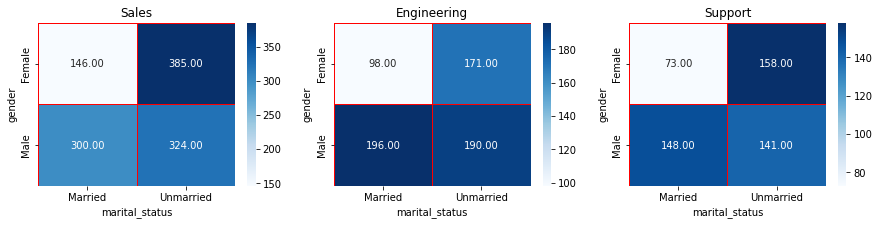

In [47]:
figsize=plt.figure(figsize=[15,3])
plt.subplot(1,3,1)
data1=dataLeft[dataLeft.dept_name=="Sales"].groupby(["gender","marital_status"])["status"].count().unstack()
sns.heatmap(data1,annot=True,cmap="Blues",linecolor='Red',linewidth=1, fmt=".2f")
plt.title("Sales")
plt.subplot(1,3,2)
data1=dataLeft[dataLeft.dept_name=="Engineering"].groupby(["gender","marital_status"])["status"].count().unstack()
sns.heatmap(data1,annot=True,cmap="Blues",linecolor='Red',linewidth=1,fmt=".2f")
plt.title("Engineering")
plt.subplot(1,3,3)
data1=dataLeft[dataLeft.dept_name=="Support"].groupby(["gender","marital_status"])["status"].count().unstack()
sns.heatmap(data1,annot=True,cmap="Blues",linecolor='Red',linewidth=1,fmt=".2f")
plt.title("Support")

### **Observations**
* In Sales Dept Unmarried Female have more exit movement followed by Unarried Male and then married Male
* In Engg married male have more exit movement followed by unmarried Male and then unmarried female
* In Support Unmarried Female have more exit movement followed by narried Male and then unmarried male


### **Analyze Relationship between each Continuous Variable and Target Variable**

In [48]:
contColumn=contColumn.to_list()
contColumn


['tenure',
 'age',
 'last_evaluation',
 'satisfaction',
 'avg_monthly_hrs',
 'n_projects',
 'status']

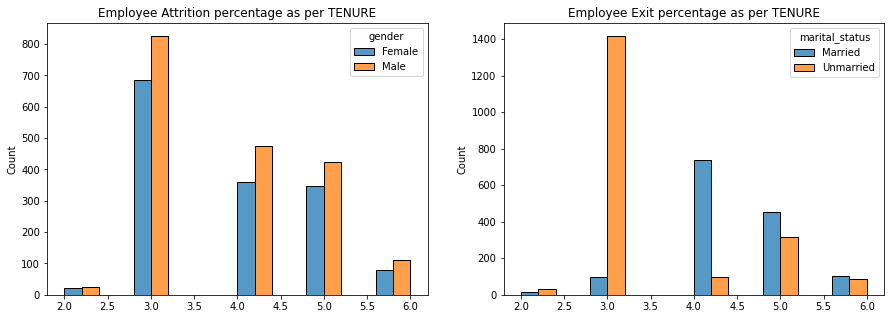

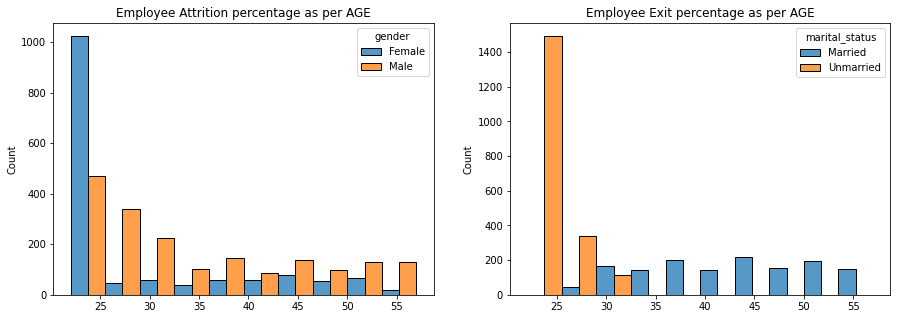

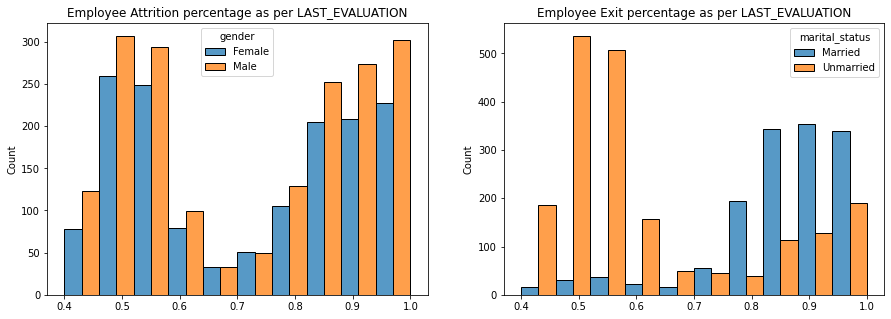

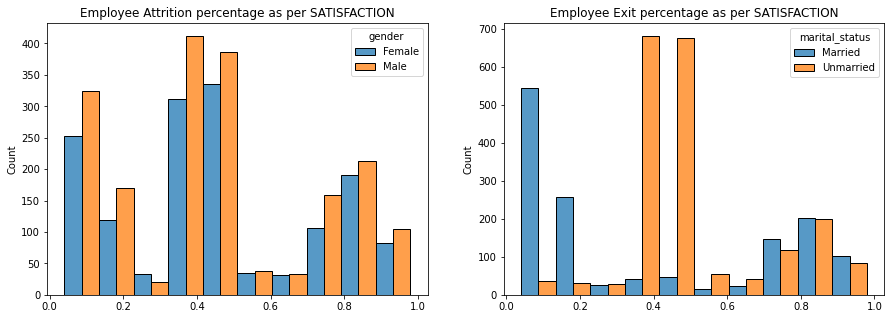

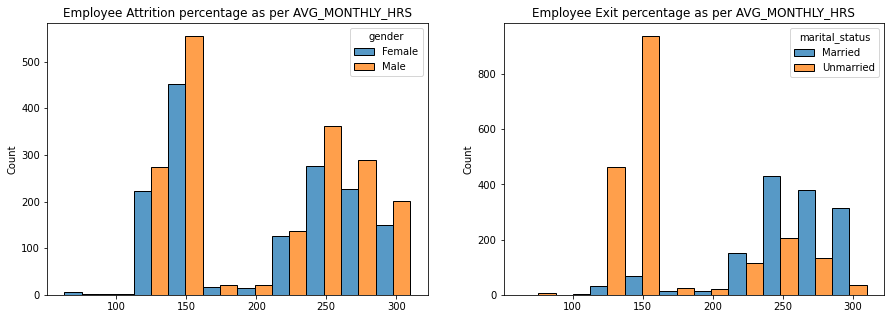

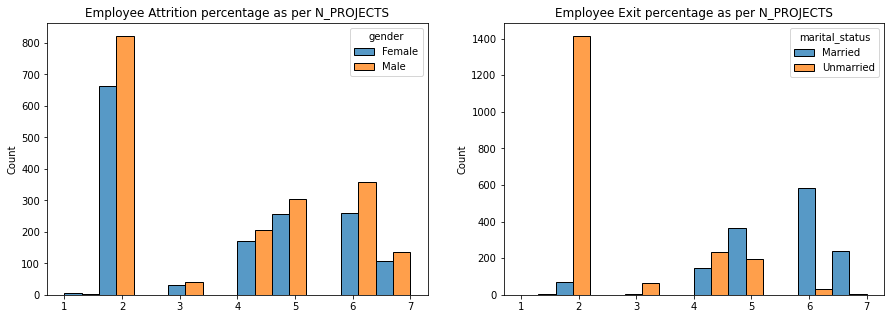

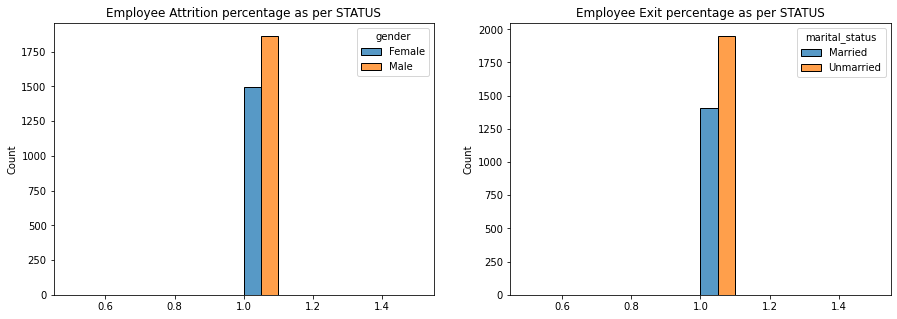

In [49]:
dataLeft=data[data.status==1]

for col in contColumn:
  fig=plt.figure(figsize=[15,5])
  plt.subplot(1,2,1)
  sns.histplot(dataLeft,x=col,bins=10, hue="gender",multiple="dodge")
  plt.title("Employee Attrition percentage as per "+col.upper())
  plt.xlabel("")
  plt.subplot(1,2,2)
  sns.histplot(dataLeft,x=col,bins=10, hue="marital_status",multiple="dodge")
  plt.title("Employee Exit percentage as per "+col.upper())
  plt.xlabel("")

### **Observations**
1. More exit from unmarried male whose monthly working hour is 150
2. More exit from unmarried male whose  movement evaluation score is .5 to .6 or .8.to.9
3. More exit from unmarried male whose are assigned 2 projects
4. More exit from unmarried male with satisfaction score 0 to.1 or .3 to.5
5. More exit from unmarried male whose tenure is 3 years
6. More exit from unmarried female with avg age bracket of 25 years

### **Correlation Matrix**

<Axes: >

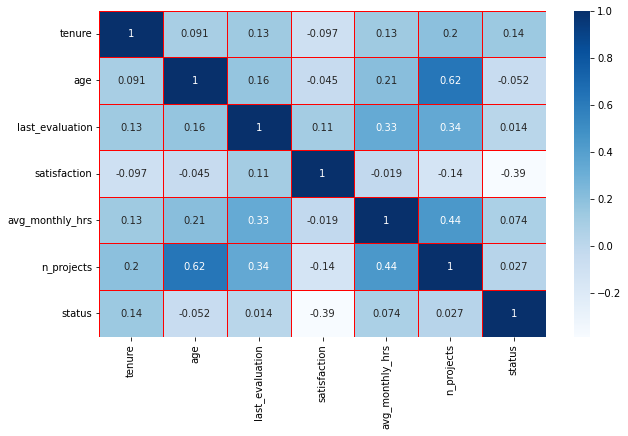

In [50]:
figure=plt.figure(figsize=[10,6])
sns.heatmap(data.corr(), cmap="Blues", annot=True,linecolor='Red',linewidth=1)

### **Observations**
* No multicolinearity

### **Check Label Imbalance**

In [51]:
data.status.value_counts()

0    10763
1     3358
Name: status, dtype: int64

# **7. Data Post-Processing**

In [52]:
data.columns

Index(['department', 'dept_name', 'gender', 'marital_status', 'tenure', 'age',
       'last_evaluation', 'satisfaction', 'filed_complaint',
       'recently_promoted', 'avg_monthly_hrs', 'n_projects', 'salary',
       'status'],
      dtype='object')

### **7.1 Data Preparation/Feature Selection**



In [53]:
X=data.drop(["status", "gender", "marital_status","dept_name","age"], axis=1)
y=data.status
print(X.shape)
print(y.shape)


(14121, 9)
(14121,)


### **Checking Target Class Imbalance**

In [54]:
y.value_counts()/y.shape[0]*100

0    76.219814
1    23.780186
Name: status, dtype: float64

# **8. Model Development & Evaluation**

### **Make PipeLine**

In [55]:
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.compose import make_column_transformer

from sklearn.impute import KNNImputer

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,VotingClassifier, AdaBoostClassifier,GradientBoostingClassifier

from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict,RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,auc,classification_report

 

max_depth=8

modelList=[LogisticRegression(),DecisionTreeClassifier(max_depth=max_depth),
           RandomForestClassifier(random_state=47,max_depth=max_depth),KNeighborsClassifier(n_neighbors=8),
           BaggingClassifier(DecisionTreeClassifier(max_depth=max_depth),n_estimators=10),AdaBoostClassifier(),GradientBoostingClassifier()]

# Define which columns should be encoded
columns_to_encode=X.select_dtypes(include="object").columns.to_list()
columns_to_scale=X.select_dtypes(include="number").columns.to_list()

# Define value of kfold during crossvalidation
kf=KFold(15,shuffle=True,random_state=47)

# Instantiate column transformer
column_trans=make_column_transformer(
    (OneHotEncoder(drop="first"),columns_to_encode),
    (RobustScaler(),columns_to_scale),
    remainder="passthrough"
    )
column_trans.fit_transform(X)

score_df=pd.DataFrame(columns=["ModelName","TrainScore","TestScore"])
for model in modelList:
  pipe=make_pipeline(column_trans,model)
  cv_score=cross_validate(pipe,X,y,cv=kf,n_jobs=-1,scoring=["accuracy","f1"],return_train_score=True)
  cv_score_df=pd.DataFrame(cv_score)
  score_df=score_df.append({"ModelName":model,"TrainScore":
                "Accuracy: {} /n F1 Score {}".format(cv_score["train_accuracy"].mean(),cv_score["train_f1"].mean()),
                "TestScore":
                "Accuracy: {} F1 Score {}".format(cv_score["test_accuracy"].mean(),cv_score["test_f1"].mean())},ignore_index=True)

print(score_df)



                                           ModelName  \
0                               LogisticRegression()   
1                DecisionTreeClassifier(max_depth=8)   
2  RandomForestClassifier(max_depth=8, random_sta...   
3                KNeighborsClassifier(n_neighbors=8)   
4  BaggingClassifier(estimator=DecisionTreeClassi...   
5                               AdaBoostClassifier()   
6                       GradientBoostingClassifier()   

                                          TrainScore  \
0  Accuracy: 0.7897508259776107 /n F1 Score 0.439...   
1  Accuracy: 0.9803079553264545 /n F1 Score 0.957...   
2  Accuracy: 0.9736612994961443 /n F1 Score 0.942...   
3  Accuracy: 0.9595536502697019 /n F1 Score 0.914...   
4  Accuracy: 0.9805254573586073 /n F1 Score 0.957...   
5  Accuracy: 0.9310702324013505 /n F1 Score 0.852...   
6  Accuracy: 0.9722247503471806 /n F1 Score 0.940...   

                                           TestScore  
0  Accuracy: 0.7890372756993848 F1 Score 0.4374

### **Selecting BaggingClassifier based on Test Score**

In [56]:
pipe=make_pipeline(column_trans,BaggingClassifier(DecisionTreeClassifier(max_depth=max_depth)))
pipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['department',
                                                   'filed_complaint',
                                                   'recently_promoted',
                                                   'salary']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['tenure', 'last_evaluation',
                                                   'satisfaction',
                                                   'avg_monthly_hrs',
                                                   'n_projects'])])),
                ('baggingclassifier',
                 BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=8)))])

# **9. Dump Model using Pickle**

In [57]:
import pickle
print(pipe)
##dump the model into a file
with open("/content/drive/MyDrive/Colab Notebooks/ModelBin/empExit_model.pkl", 'wb') as f_out:
    pickle.dump(pipe, f_out) # write final_model in .bin file
    f_out.close()  # close the file 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['department',
                                                   'filed_complaint',
                                                   'recently_promoted',
                                                   'salary']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['tenure', 'last_evaluation',
                                                   'satisfaction',
                                                   'avg_monthly_hrs',
                                                   'n_projects'])])),
                ('baggingclassifier',
                 BaggingClass

# **10. Load Model using Pickle and Predict Output**

In [58]:
##loading the model from the saved file

with open('/content/drive/MyDrive/Colab Notebooks/ModelBin/empExit_model.pkl', 'rb') as f_in:
    model = pickle.load(f_in)

##Predict
dataValidation_pred=model.predict(dataValidation)

print(dataValidation_pred)
submission = pd.DataFrame({'Id':empId,'Exit_pred':dataValidation_pred})
from google.colab import files
submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
files.download('submission.csv')

[1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>